In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
df=pd.read_csv('MLP CALL test FINAL Results.csv')
df

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_MLP
0,179.02,1.649425,0.47056,0.00645,0.91520,-0.02033,1.08559,0.26887,18.55,195.0,20.895615,16.759176
1,179.02,1.649425,0.44009,0.00641,0.90725,-0.02019,1.02520,0.26711,16.70,200.0,18.986668,14.750557
2,179.02,1.649425,0.41070,0.00633,0.89419,-0.01936,0.96454,0.26497,14.95,205.0,17.174165,13.128058
3,179.02,1.649425,0.38230,0.00629,0.87701,-0.01918,0.90546,0.26478,13.60,210.0,15.664548,11.697142
4,179.02,1.649425,0.35522,0.00610,0.85580,-0.01888,0.84713,0.26322,12.55,215.0,14.150901,10.438192
...,...,...,...,...,...,...,...,...,...,...,...,...
83098,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778,8.622215
83099,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164,6.227463
83100,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698,3.561239
83101,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689,3.010648


In [25]:
df['Moneyness'] = df[' [UNDERLYING_LAST]']/df[' [STRIKE]']
df


,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_MLP,Moneyness
0,179.02,1.649425,0.47056,0.00645,0.91520,-0.02033,1.08559,0.26887,18.55,195.0,20.895615,16.759176,0.918051
1,179.02,1.649425,0.44009,0.00641,0.90725,-0.02019,1.02520,0.26711,16.70,200.0,18.986668,14.750557,0.895100
2,179.02,1.649425,0.41070,0.00633,0.89419,-0.01936,0.96454,0.26497,14.95,205.0,17.174165,13.128058,0.873268
3,179.02,1.649425,0.38230,0.00629,0.87701,-0.01918,0.90546,0.26478,13.60,210.0,15.664548,11.697142,0.852476
4,179.02,1.649425,0.35522,0.00610,0.85580,-0.01888,0.84713,0.26322,12.55,215.0,14.150901,10.438192,0.832651
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83098,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778,8.622215,0.698095
83099,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164,6.227463,0.666364
83100,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698,3.561239,0.610833
83101,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689,3.010648,0.598367


In [26]:
df_ITM=df[df['Moneyness']>1.05]

In [27]:
y_true=df_ITM[' [C_LAST]']
y_pred=df_ITM['Call_MLP']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  3.5939880747211994
MSE =  29.58000710323611
RMSE =  5.438750509375854


In [28]:
df_OTM=df[df['Moneyness']<0.95]

In [29]:
y_true=df_OTM[' [C_LAST]']
y_pred=df_OTM['Call_MLP']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  0.5568312233119902
MSE =  0.762989434812253
RMSE =  0.8734926644295606


In [30]:
df_ATM=df[df['Moneyness'].between(0.95,1.05)]
df_ATM

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_MLP,Moneyness
47,179.02,2.071233,0.60095,0.00553,0.99482,-0.01835,1.61353,0.27277,30.03,175.0,33.246841,28.383072,1.022971
48,179.02,2.071233,0.57244,0.00564,1.01142,-0.01851,1.55538,0.27221,27.50,180.0,30.914367,26.065647,0.994556
49,179.02,2.071233,0.54507,0.00564,1.02129,-0.01858,1.49503,0.27252,26.02,185.0,28.801196,24.099768,0.967676
75,178.23,0.008219,0.82827,0.02773,0.04695,-0.28103,0.01234,0.48636,9.00,170.0,8.812424,11.340046,1.048412
76,178.23,0.008219,0.77246,0.03780,0.05600,-0.30062,0.01276,0.42723,6.75,172.5,6.510130,9.075008,1.033217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83037,293.20,1.714959,0.56585,0.00356,1.48554,-0.03075,1.86662,0.28745,41.41,290.0,50.054150,44.625950,1.011034
83038,293.20,1.714959,0.52708,0.00372,1.50625,-0.03017,1.80489,0.28085,37.60,300.0,44.652899,39.989370,0.977333
83084,293.20,2.060274,0.60632,0.00316,1.58666,-0.02743,2.25888,0.28749,51.52,280.0,59.741464,53.286564,1.047143
83085,293.20,2.060274,0.57323,0.00319,1.62075,-0.02812,2.20236,0.28901,46.23,290.0,55.308927,48.406937,1.011034


In [31]:
y_true=df_ATM[' [C_LAST]']
y_pred=df_ATM['Call_MLP']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.064850445499624
MSE =  1.8774576840060608
RMSE =  1.3702035191919706


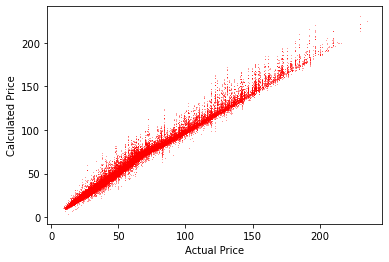

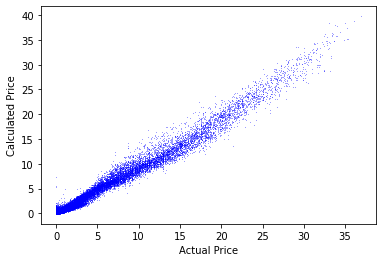

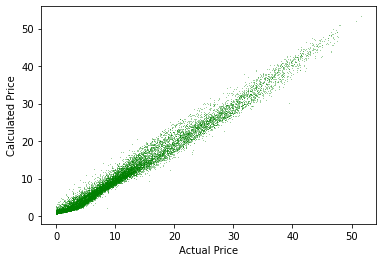

In [40]:
x1=df_ITM[' [C_LAST]']
y1=df_ITM['Call_MLP']
x2=df_OTM[' [C_LAST]']
y2=df_OTM['Call_MLP']
x3=df_ATM[' [C_LAST]']
y3=df_ATM['Call_MLP']
plt.scatter(x1, y1,color='red',linewidth=0.2,alpha=0.5, s=0.5, label='ITM')
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()
plt.scatter(x2, y2,color='blue',linewidth=0.2,alpha=0.5, s=0.5, label='OTM')
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()
plt.scatter(x3, y3,color='green',linewidth=0.2,alpha=0.5, s=0.5, label='ATM')
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()


In [42]:
df=pd.read_csv('LSTM Put test FINAL Results.csv')
df

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_LSTM
0,194.19,1.597370,155.0,9.31,-0.21728,0.00458,0.71246,-0.01784,-0.82469,0.25979,6.751424,10.223564
1,194.19,1.597370,160.0,10.60,-0.24403,0.00499,0.75959,-0.01922,-0.93018,0.25462,7.759016,11.630687
2,194.19,1.597370,165.0,11.85,-0.27321,0.00539,0.80422,-0.01951,-1.04431,0.24932,8.862789,13.089265
3,194.19,1.597370,170.0,14.00,-0.30350,0.00573,0.84444,-0.02100,-1.16709,0.24518,10.166727,14.684264
4,194.19,1.597370,175.0,15.53,-0.33531,0.00607,0.87844,-0.02109,-1.29530,0.23976,11.495512,16.382809
...,...,...,...,...,...,...,...,...,...,...,...,...
72535,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701,71.422640
72536,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230,84.157390
72537,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575,95.956640
72538,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552,105.336150


In [43]:
df['Moneyness'] = df[' [UNDERLYING_LAST]']/df[' [STRIKE]']
df

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_LSTM,Moneyness
0,194.19,1.597370,155.0,9.31,-0.21728,0.00458,0.71246,-0.01784,-0.82469,0.25979,6.751424,10.223564,1.252839
1,194.19,1.597370,160.0,10.60,-0.24403,0.00499,0.75959,-0.01922,-0.93018,0.25462,7.759016,11.630687,1.213688
2,194.19,1.597370,165.0,11.85,-0.27321,0.00539,0.80422,-0.01951,-1.04431,0.24932,8.862789,13.089265,1.176909
3,194.19,1.597370,170.0,14.00,-0.30350,0.00573,0.84444,-0.02100,-1.16709,0.24518,10.166727,14.684264,1.142294
4,194.19,1.597370,175.0,15.53,-0.33531,0.00607,0.87844,-0.02109,-1.29530,0.23976,11.495512,16.382809,1.109657
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72535,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701,71.422640,0.837714
72536,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230,84.157390,0.814444
72537,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575,95.956640,0.792432
72538,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552,105.336150,0.771579


In [44]:
df_ITM=df[df['Moneyness']<0.95]

In [46]:
y_true=df_ITM[' [P_LAST]']
y_pred=df_ITM['Put_LSTM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  3.930243348064883
MSE =  42.96963827303065
RMSE =  6.555123055521586


In [48]:
df_OTM=df[df['Moneyness']>1.05]
y_true=df_OTM[' [P_LAST]']
y_pred=df_OTM['Put_LSTM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  0.8456326668199396
MSE =  1.0491039677116107
RMSE =  1.0242577642915922


In [49]:
df_ATM=df[df['Moneyness'].between(0.95,1.05)]
y_true=df_ATM[' [P_LAST]']
y_pred=df_ATM['Put_LSTM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.4343868997851628
MSE =  4.123407116139761
RMSE =  2.0306174223963906


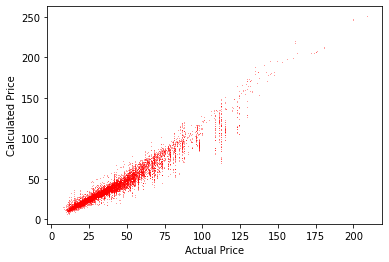

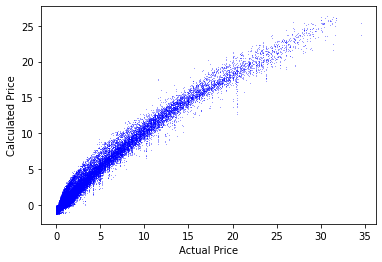

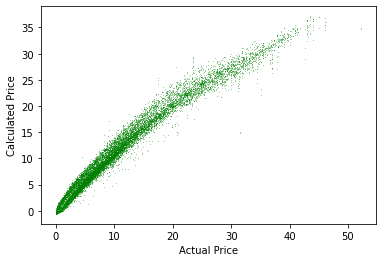

In [50]:
x1=df_ITM[' [P_LAST]']
y1=df_ITM['Put_LSTM']
x2=df_OTM[' [P_LAST]']
y2=df_OTM['Put_LSTM']
x3=df_ATM[' [P_LAST]']
y3=df_ATM['Put_LSTM']
plt.scatter(x1, y1,color='red',linewidth=0.2,alpha=0.5, s=0.5, label='ITM')
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()
plt.scatter(x2, y2,color='blue',linewidth=0.2,alpha=0.5, s=0.5, label='OTM')
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()
plt.scatter(x3, y3,color='green',linewidth=0.2,alpha=0.5, s=0.5, label='ATM')
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()
